In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [4]:
X_train = pd.read_csv("MNIST_data/bindigit_trn.csv",header=None,dtype=np.float32).as_matrix()
y_train = pd.read_csv("MNIST_data/targetdigit_trn.csv",header=None,names=["Label"],dtype=np.float32).as_matrix()

X_test = pd.read_csv("MNIST_data/bindigit_tst.csv",header=None,dtype=np.float32).as_matrix()
y_test = pd.read_csv("MNIST_data/targetdigit_tst.csv",header=None,names=["Label"],dtype=np.float32).as_matrix()

In [8]:
y_train

array([[ 6.],
       [ 6.],
       [ 1.],
       ..., 
       [ 5.],
       [ 6.],
       [ 5.]], dtype=float32)

In [5]:
#Helper class for plotting images
def plotImage(images,predictions):
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(predictions[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()    

In [6]:
def plotWeights(weights):
    n = weights.shape[0]  # how many digits we will display
    plt.figure(figsize=(20, 20))
    for i in range(n):
        # display weights
        ax = plt.subplot(10, 10, i + 1)
        plt.imshow(weights[i].reshape(28, 28))
        #plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [31]:
nrOfNodes = 50

rbm = BernoulliRBM(n_components=nrOfNodes, learning_rate=0.01,n_iter=20,
                     batch_size=64, random_state=42,verbose=True)

In [32]:
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -354.20, time = 0.46s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -336.36, time = 0.66s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -286.54, time = 0.58s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -250.58, time = 0.56s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -220.29, time = 0.57s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -209.87, time = 0.55s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -205.05, time = 0.54s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -201.66, time = 0.54s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -198.83, time = 0.58s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -197.01, time = 0.56s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -195.43, time = 0.53s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -194.63, time = 0.53s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -193.84, time = 0.54s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -192.66, time = 0.53s
[BernoulliRBM] 

BernoulliRBM(batch_size=64, learning_rate=0.01, n_components=50, n_iter=20,
       random_state=42, verbose=True)

In [23]:
weights = rbm.components_
weights.shape

(150, 784)

In [24]:
#plotWeights(weights)

ValueError: num must be 1 <= num <= 100, not 101

In [33]:
#Reconstruct digits from test data through gibbs sampling
pred = rbm.gibbs(X_test).astype(int)

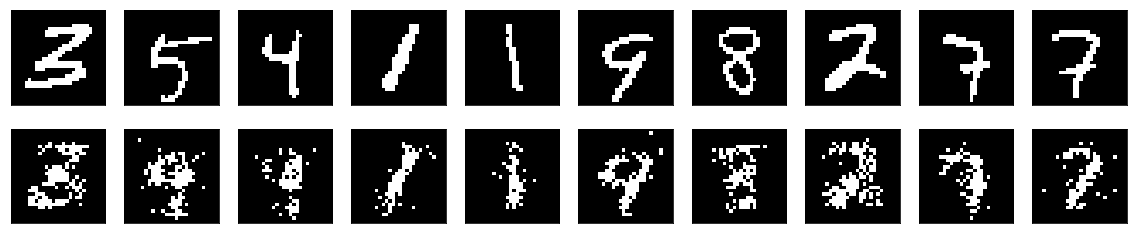

In [78]:
plotImage(X_test[:10,:],pred[:10,:])

In [34]:
#Calculate mean squared error
mse = mean_squared_error(X_test,pred)
print(mse)

0.157758290816
